# Machine Learning - Principal Component Analysis
### Unsupervised Learning Project

In this project, it will classify particles into gamma(signal) or hadrons(background). Knowing that the geatures are correlated, it will perform PCA to get a new set of features, and select the features that contain the most information.

The data using is this project was generated by a Monte Carlo program, Corsika, described in D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, Forschungszentrum Karlsruhe FZKA 6019 (1998).

### Import Python Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

### Observing the Dataset
Create a dataframe with the dataset and remove null values. 

In [2]:
df = pd.read_csv('./telescope_data.csv', index_col=0)
df.dropna()
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Separate the Data
Extract the class column and the rest as the data matrix.

In [3]:
classes = df['class']
data_matrix = df.drop(columns='class')
data_matrix

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


### Create a Correlation Matrix
Check the correlation between features and plot it as a heatmap.

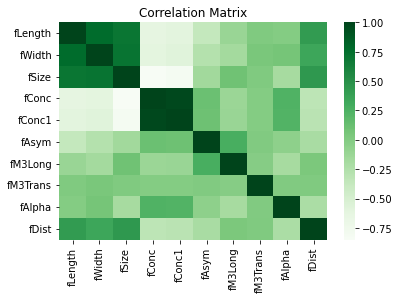

In [4]:
correlation_matrix = data_matrix.corr()

ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Greens', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()


### Perform Eigendecomposition
Find the eigenvectors and eigenvalues and order the eigenvalues from greatest to smallest.

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

Eigenvalues length: 10, Original Number of Features: 10


In [6]:
indices = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

print(eigenvalues.shape, eigenvectors.shape)

(10,) (10, 10)


Find the proportions of each eigenvalue to the total sum of the eigenvalues. 

In [7]:
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

Plotting the principal axes vs the information proportions below, the plot below shows that the first two principal axes explained the majority of information.

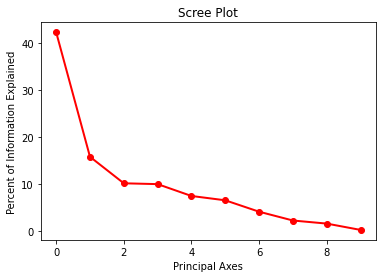

In [8]:
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Axes')
plt.ylabel('Percent of Information Explained')
plt.show()

The plot below shows the cumulative percentages of the ordered eigenvectors. The horizontal line indicates the 95% mark, and a vertical line for the third principal axis.

In [9]:
cumulative_information_percents = np.cumsum(information_percents)

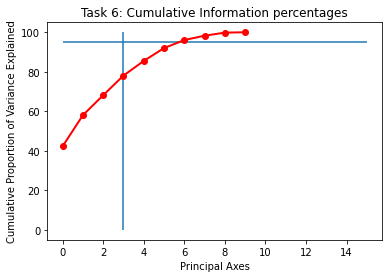

In [10]:
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=100)
plt.title('Task 6: Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

### Performing PCA
Calulate the standardized matrix and build a PCA model.

In [11]:
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd

In [12]:
pca = PCA()
principal_components = pca.fit_transform(data_matrix_standardized)
print(f'Number of features in the data matrix: {principal_components.shape[1]}')
print(f'Number of features in the principal components: {data_matrix.shape[1]}')

Number of features in the data matrix: 10
Number of features in the principal components: 10


Calculate the eigenvalues from the signular values and extract the eigenvectors.

In [13]:
singular_values = pca.singular_values_
eigenvalues = singular_values ** 2

# Eigenvectors are in the property `.components_` as row vectors. 
# To turn them into column vectors, transpose them using the NumPy method `.T`.
eigenvectors = pca.components_.T

Extract the variance ratios that are equaivalent to the eigenvalue proportions.

In [15]:
principal_axes_variance_ratios = pca.explained_variance_ratio_
principal_axes_variance_percents = principal_axes_variance_ratios * 100

Perform PCA again but with 2 principal axes.

In [16]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_matrix_standardized)

In [17]:
print(f'Number of Principal Components Features: {principal_components.shape[1]}')
print(f'Number of Original Data Features: {data_matrix_standardized.shape[1]}')

Number of Principal Components Features: 2
Number of Original Data Features: 10


Plot the princial components as a scatter plot.

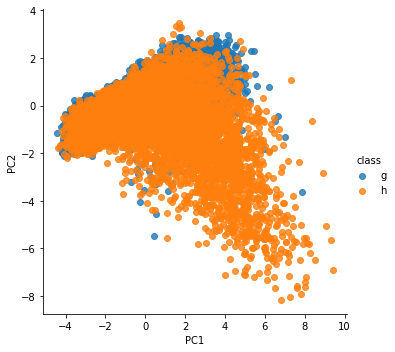

In [18]:
principal_components_data = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'class': classes,
})

sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False)
plt.show()

In [19]:
principal_components_data['PC2']

0        0.369247
1        0.549211
2       -1.831268
3        0.031628
4        0.552887
           ...   
19015    0.346005
19016   -0.695700
19017    0.491173
19018   -2.310498
19019   -4.764197
Name: PC2, Length: 19020, dtype: float64

In [20]:
# Use the one-hot-encoded classes to create y
y = classes.astype('category').cat.codes

Fit the classifier with the first two features of the original standardized data matrix and generate a score. Compare the two models, the first one with PCA features and the second model with the original data features. The model with PCA features has a higher accuracy score!

In [21]:
pca_1 = PCA(n_components=2)
X = pca_1.fit_transform(data_matrix_standardized) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train) 

# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 2 PCA features: {score_1}')

Score for model with 2 PCA features: 0.7417556157400031


In [23]:
# Using the original features 
# Select two features from the original data
first_two_original_features = [0, 1]
X_original = data_matrix_standardized.iloc[:, first_two_original_features]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.33, random_state=42)

In [25]:
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)
 
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with 2 original features: {score_2}')

Score for model with 2 original features: 0.7192926557272582
